# **Inicializando o Tabuleiro**

### **Definindo tabuleio**

In [68]:
def initialize_board():
  ## Tabuleiro vazio:
  tabuleiroList = []
  for i in range(64):
    if i == 27 or i == 36:
      tabuleiroList.append(-1) #colocando peças BRANCAS na posição inicial do meio do tabuleiro
    elif i == 28 or i == 35:
      tabuleiroList.append(1) #colocando peças PRETAS na posição inicial do meio do tabuleiro
    else:
      tabuleiroList.append(0)

  return tabuleiroList

  #Printa conteúdo do tabuleiro na proporção de 8x8
  #for i in range(64):
  #  print("   {}".format(tabuleiro[i]), end="")
  #  if ((i + 1) % 8 == 0):
#    print("\n")


### **Definindo Jogadas Válidas**

In [69]:
## Função que devolve as jogadas válidas
def get_valid_moves(tab, turn) :
    valids = []
    for i in range(len(tab)) :
        if tab[i] == turn:  


            ##Verificação da linha sentido direita 
            if i <= 61 and (i+1)%8!=0:
              if tab[i+1] == -(turn):
                for y in range(2,8):
                  if (i+y)%8==0:
                    break
                  elif tab[i+y] == 0:
                    valids.append(i+y)
                    break

 
            if i >= 2 and (i-1)%8!=7:
              if tab[i-1] == -(turn):
                for y in range(2,8):
                  if (i-y)%8==7:
                    break
                  elif tab[i-y] == 0:
                    valids.append(i-y)
                    break     
                


            ##Verificação da coluna sentido baixo 
            if i <= 47:
              if tab[i+8] == -(turn): #Verificação de igualdade com a peça adversária
                if tab[i+16] == 0:
                    valids.append(i+16)
                elif tab[i+24] == 0:
                    valids.append(i+24)
                elif tab[i+32] == 0:
                    valids.append(i+32)
                elif tab[i+40] == 0:
                    valids.append(i+40)
                elif tab[i+48] == 0:
                    valids.append(i+48)
                elif tab[i+56] == 0:
                  valids.append(i+56)

            
            ##Verificação da coluna sentido cima
            if i > 15:
              if tab[i-8] == -(turn): #Verificação de igualdade com a peça adversária
                if tab[i-16] == 0:
                  valids.append(i-16)
                elif tab[i-24] == 0:
                  valids.append(i-24)
                elif tab[i-32] == 0:
                  valids.append(i-32)
                elif tab[i-40] == 0:
                  valids.append(i-40)
                elif tab[i-48] == 0:
                  valids.append(i-48)
                elif tab[i-56] == 0:
                  valids.append(i-56)
            

            ##Verificação da diagonal inferior direita 
            if i <= 45:
              if tab[i+9] == -(turn): #Verificação da diagonal inferior direita
                if tab[i+18] == 0:
                  valids.append(i+18)
                elif tab[i+27] == 0:
                  valids.append(i+27)
                elif tab[i+36] == 0:
                  valids.append(i+36)
                elif tab[i+45] == 0:
                  valids.append(i+45)
                elif tab[i+54] == 0:
                  valids.append(i+54)
                elif tab[i+63] == 0:
                  valids.append(i+63)

            ##Verificação da diagonal inferior esquerda
            if i <= 47:
              if tab[i+7] == -(turn):
                if tab[i+14] == 0:
                  valids.append(i+14)
                elif tab[i+21] == 0:
                  valids.append(i+21)
                elif tab[i+28] == 0:
                  valids.append(i+28)
                elif tab[i+35] == 0:
                  valids.append(i+35)
                elif tab[i+42] == 0:
                  valids.append(i+42)
                elif tab[i+49] == 0:
                  valids.append(i+49)

              ##Verificação da diagonal superior direita
              if i >= 16:
                if tab[i-7] == -(turn):
                  if tab[i-14] == 0:
                    valids.append(i-14)
                  elif tab[i-21] == 0:
                    valids.append(i-21)
                  elif tab[i-28] == 0:
                    valids.append(i-28)
                  elif tab[i-35] == 0:
                    valids.append(i-35)
                  elif tab[i-42] == 0:
                    valids.append(i-42)
                  elif tab[i-49] == 0:
                    valids.append(i-49)

            ##Verificação da diagonal superior esquerda
            if i >= 18:
              if tab[i-9] == -(turn): #Verificação da diagonal inferior direita
                if tab[i-18] == 0:
                  valids.append(i-18)
                elif tab[i-27] == 0:
                  valids.append(i-27)
                elif tab[i-36] == 0:
                  valids.append(i-36)
                elif tab[i-45] == 0:
                  valids.append(i-45)
                elif tab[i+54] == 0:
                  valids.append(i-54)
                elif tab[i-63] == 0:
                  valids.append(i-63)  


    return valids

### **Desenhando as peças no tabuleiro**

In [70]:
def draw_piece(draw, cell, piece) :
    ## Convertendo linear para matricial
    line   = cell // 8
    column = cell  % 8

    ## Gerando as coordenadas
    x0 = column * 50
    x1 = (column+1)*50
    y0 = line*50
    y1 = (line+1)*50

    if piece == 1 :
        draw.ellipse([x0, y0, x1, y1], width=2, fill = "black")
    elif piece == -1 :
        draw.ellipse([x0, y0, x1, y1], width=2, fill = "white")

### **Desenhando jogadas válidas no tabuleiro**

In [71]:
def draw_piece_valid_moves(draw, cell) :
    ## Convertendo linear para matricial
    line   = cell // 8
    column = cell  % 8

    ## Gerando as coordenadas
    x0 = column * 50
    x1 = (column+1)*50
    y0 = line*50
    y1 = (line+1)*50

    draw.ellipse([x0, y0, x1, y1], width=1, outline = "silver")

### **Desenhando tabuleiro junto com jogadas válidas**

In [80]:
## Importa biblioteca
from PIL import Image, ImageDraw

def draw_board(tab, turn) :
    turno = turn
    ## Desenhamos um quadrado 400x400
    board = Image.new('RGB', (400, 400),  "green")

    ## Criamos uma espécie de canvas para desenhar
    draw  = ImageDraw.Draw(board)

    ## Desenhamos duas linhas horizontais
    x0 = 0
    y0 = 0
    x1 = 400
    y1 = 0
    for i in range(9):
      draw.line( (x0, y0, x1, y1), fill = "black", width = 1 ) 
      y0 += 50
      y1 = y0

    ## Desenhamos duas linhas verticais
    x0 = 0
    y0 = 0
    x1 = 0
    y1 = 400
    for i in range(9):
      draw.line( (x0, y0, x1, y1), fill = "black", width = 1 ) 
      x0 += 50
      x1 = x0

    ## Densenha as peças no tabuleiro
    for i in range(len(tab)) :
        if (tab[i]) :
            draw_piece(draw, i, tab[i])
   
    ## Denfine as jogadas válidas para o atual ou próximo jogador no tabuleiro
    if playgame == True :  
      if turn == 1:
        turno = -1
      else :
        turno = 1
   
    validMove = get_valid_moves(tabuleiro, turno)

    for i in range(len(validMove)) :
        draw_piece_valid_moves(draw, validMove[i])   

    return board



[26, 44, 37, 19]


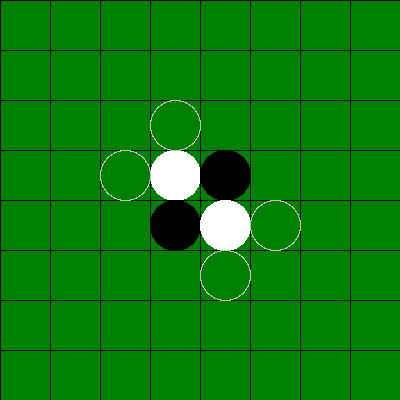

In [29]:
board = draw_board(tabuleiro, 1)
display(board)

# **Criando jogadores "bobinho" e humano**

### **Jogador bobinho que faz jogadas ao acaso**

In [73]:
import random
def player(tab, turn) :
    valid_moves = get_valid_moves(tab, turn)
    if valid_moves :
        return (turn, random.choice(valid_moves) )

In [ ]:
jogada = player(tabuleiro, 1)
print(jogada)

(1, 37)


### **Jogador humano**

In [74]:
def human_player(tab, turn) :        
    valids  = get_valid_moves(tab, turn)
    print("Jogadas válidos: %s" % (valids))

    board = draw_board( tab, turn )
    display(board)

    move = int(input())

    while not move in valids : 
        print("Jogadas válidos: %s" % (valids))
        move = int(input())
    return turn, move

In [35]:
human_player(tabuleiro, 1)

Jogadas válidos: [26, 44, 37, 19]
26


(1, 26)

### **Definindo ganhador**

In [75]:
## Código que devolve o jogador vencedor, 
## ou zero em caso de não ter um vencedor
## definido
def winner(tab) :
    somas0 = tab.count(0)
    somas1 = tab.count(1)
    somas2 = tab.count(-1)
    if (somas2 > somas1) and (somas0 == 0) : #Pecas BRANCAS ganham quando forem maioria, e quando não houverem espacos vazios
        return -1
    elif (somas2 < somas1) and (somas0 == 0): #Pecas PRETAS ganham quando forem maioria, e quando não houverem espacos vazios
        return 1
    else:
        return 0

### **Desenhando jogada escolhida( NÃÃO EXECUTAR ESSA FUNÇÂO SERÁ FEITA DEPOIS!)**

In [ ]:
def paint_ball(tab, pos, turn) :
  cont = 2
  if tab[cont-2] 

# **Função que gerencia o jogo**

In [81]:
## Abaixo uma função que gerencia um jogo. 
def game(humano_player, player) :
    ## Inicialização
    playgame = False
    turn   = 1
    result = 0 
    tabuleiro = tuple( initialize_board() )
    
    ## Lista que guardará o histórico
    history = [] 

    ## Enquanto houverem jogadas, pedimos para o jogador vez prosseguir
    while get_valid_moves(tabuleiro, turn) :

        ## Pedindo uma jogada ao jogador da vez.
        piece, pos = None, None
        if turn == 1 :
            piece, pos = human_player(tabuleiro, turn)    
        else : 
            piece, pos = player(tabuleiro, turn)
        
         ## Colocando a peça no tabuleiro
        ltab = list(tabuleiro)
        ltab[pos] = piece
        ##ltab = paint_ball(ltab) função que irá mudar as cores das peças
        tabuleiro  = tuple(ltab)

        # Após o primeiro lance indica que o jogo começou
        playgame = True;

        ## Adicionando tabuleiro no histórico
        history.append(tabuleiro)

        ## Verificando se alguém ganhou
        result = winner(tabuleiro)
        if result :
            break

        ## Trocando a vez de jogar
        turn = -turn
    
    return result, history


Jogadas válidos: [26, 44, 37, 19]


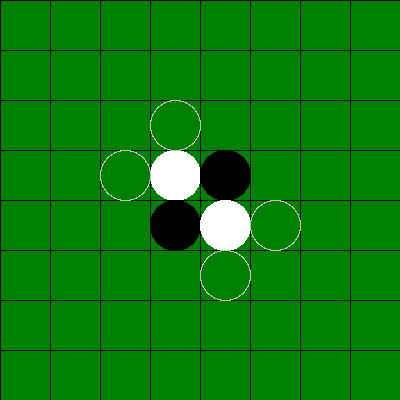

KeyboardInterrupt: ignored

In [84]:
result, history = game(human_player, player)
print(result)